<a href="https://colab.research.google.com/github/HromovAndrey/II_Homework_mood_7_part_1/blob/main/%D0%94%D0%97_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризацію клієнтів. [Опис даних](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних


In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer

In [10]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [11]:
df.isnull().sum()

,0
ID,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [12]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

In [13]:
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = scaler_standard.fit_transform(df[numerical_features])

In [14]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

In [15]:
def evaluate_kmeans(X, max_k=10):
    distortions = []
    silhouette_scores = []
    calinski_scores = []
    k_range = range(1, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        labels = kmeans.labels_
        distortions.append(kmeans.inertia_)
        if k > 1:
            silhouette_scores.append(silhouette_score(X, labels))
            calinski_scores.append(calinski_harabasz_score(X, labels))
        else:
            silhouette_scores.append(None)
            calinski_scores.append(None)

    return k_range, distortions, silhouette_scores, calinski_scores

In [16]:
k_range, distortions, silhouette_scores, calinski_scores = evaluate_kmeans(df_standard_scaled[numerical_features])


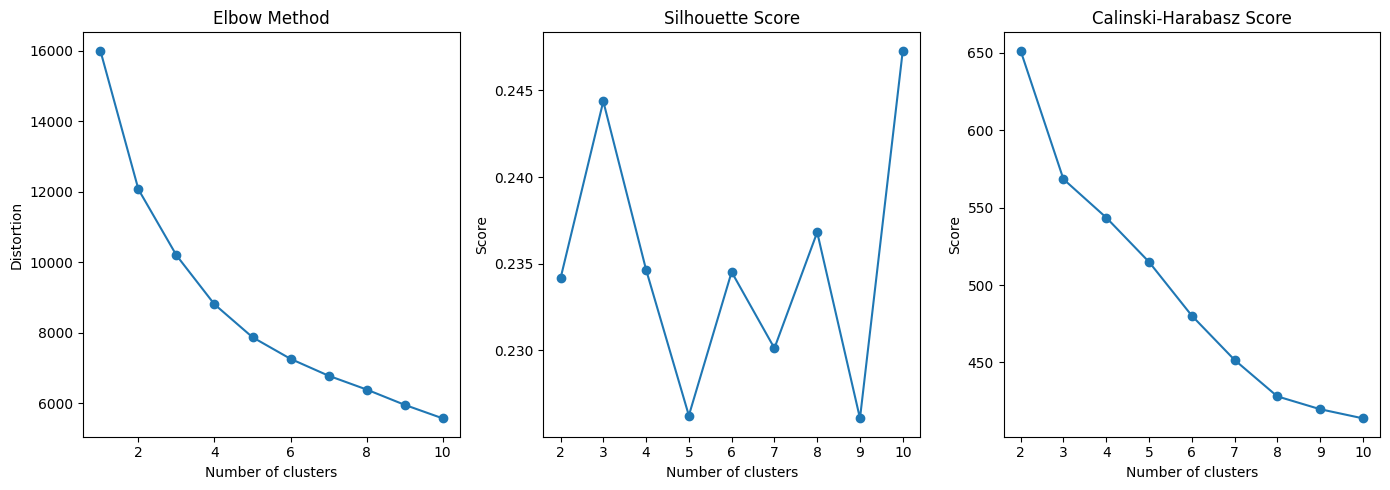

In [17]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.subplot(1, 3, 2)
plt.plot(k_range[1:], silhouette_scores[1:], marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.plot(k_range[1:], calinski_scores[1:], marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [18]:
def plot_silhouette(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    print(f'For n_clusters = {k}, the average silhouette score is {silhouette_avg:.3f}')

    sample_silhouette_values = silhouette_samples(X, labels)
    plt.figure(figsize=(8, 6))
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor='lightblue')
        plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
        y_lower = y_upper + 10

    plt.title(f'Silhouette plot for the various clusters')
    plt.xlabel('The silhouette coefficient values')
    plt.ylabel('Cluster label')
    plt.show()

In [19]:
optimal_k = 4
plot_silhouette(df_standard_scaled[numerical_features], optimal_k)

For n_clusters = 4, the average silhouette score is 0.235


NameError: name 'silhouette_samples' is not defined

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_standard_scaled['Cluster'] = kmeans.fit_predict(df_standard_scaled[numerical_features])

In [ ]:
cluster_means = df_standard_scaled.groupby('Cluster').mean()
cluster_means

In [ ]:
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Средние значения по кластерам')
plt.xlabel('Cluster')
plt.ylabel('Средние значения')
plt.show()

In [ ]:
lower_bound = df[numerical_features].quantile(0.01)
upper_bound = df[numerical_features].quantile(0.99)
df_cleaned = df[~((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).any(axis=1)]

In [ ]:
df_cleaned_scaled = df_cleaned.copy()
df_cleaned_scaled[numerical_features] = scaler_standard.fit_transform(df_cleaned[numerical_features])

In [ ]:
kmeans_cleaned = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned_scaled['Cluster'] = kmeans_cleaned.fit_predict(df_cleaned_scaled[numerical_features])

In [ ]:
cluster_means_cleaned = df_cleaned_scaled.groupby('Cluster').mean()
print(cluster_means_cleaned)